# 🧪 Model Evaluation

This notebook focuses on evaluating classification models using various performance metrics  
beyond accuracy, to gain deeper insights into model behavior.

---

## 🎯 Purpose

To assess and compare the performance of selected models  
using confusion matrix, precision, recall, F1 score, and ROC/AUC.

## 📦 Dataset

Same processed dataset used in previous notebooks:  
[Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)  
via public repository: [Data Science Dojo GitHub](https://github.com/datasciencedojo/datasets)

📦 1. Load the Dataset & Predictions

We begin by loading the processed dataset used for modeling.  
For consistency, we also regenerate model predictions using the same train/test split.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load processed dataset
df = pd.read_csv("feature_engineered_titanic.csv")

# Target and features
y = df['Survived']
X_full = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
X_safe = X_full.drop(columns=['Cabin', 'Title'])

# Shared train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_safe, y, test_size=0.2, random_state=42
)

🔍 2. Evaluate Models

We evaluate each model using the following metrics:

- **Accuracy**: overall correctness
- **Precision**: correctness among predicted positives
- **Recall**: coverage of actual positives
- **F1 Score**: balance between precision and recall
- **Confusion Matrix**: breakdown of true/false predictions
- **ROC Curve & AUC**: model discrimination capability

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)

# Train all models using the same data split
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

# Store predictions and probability scores
predictions = {}
probas = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        probas[name] = model.predict_proba(X_test)[:, 1]

📊 3. Metric Comparison

We compare each model using standard classification metrics:  
accuracy, precision, recall, and F1 score.

In [20]:
# Create a comparison table with evaluation metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

for name, y_pred in predictions.items():
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1 Score"].append(f1_score(y_test, y_pred))

metrics_df = pd.DataFrame(metrics).set_index("Model").sort_values(by="F1 Score", ascending=False)
metrics_df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Gradient Boosting,0.815642,0.788732,0.756757,0.772414
XGBoost,0.798883,0.763889,0.743243,0.753425
Random Forest,0.798883,0.771429,0.729730,0.750000
Logistic Regression,0.804469,0.800000,0.702703,0.748201
Decision Tree,0.776536,0.707317,0.783784,0.743590
KNN,0.731844,0.716667,0.581081,0.641791


📉 4. Confusion Matrix

Confusion matrices break down prediction results into correct and incorrect classifications.

By comparing false positives (FP) and false negatives (FN),  
we can understand which types of errors each model tends to make.

- High FN → missed survivors (low recall)  
- High FP → overpredicting survival (low precision)

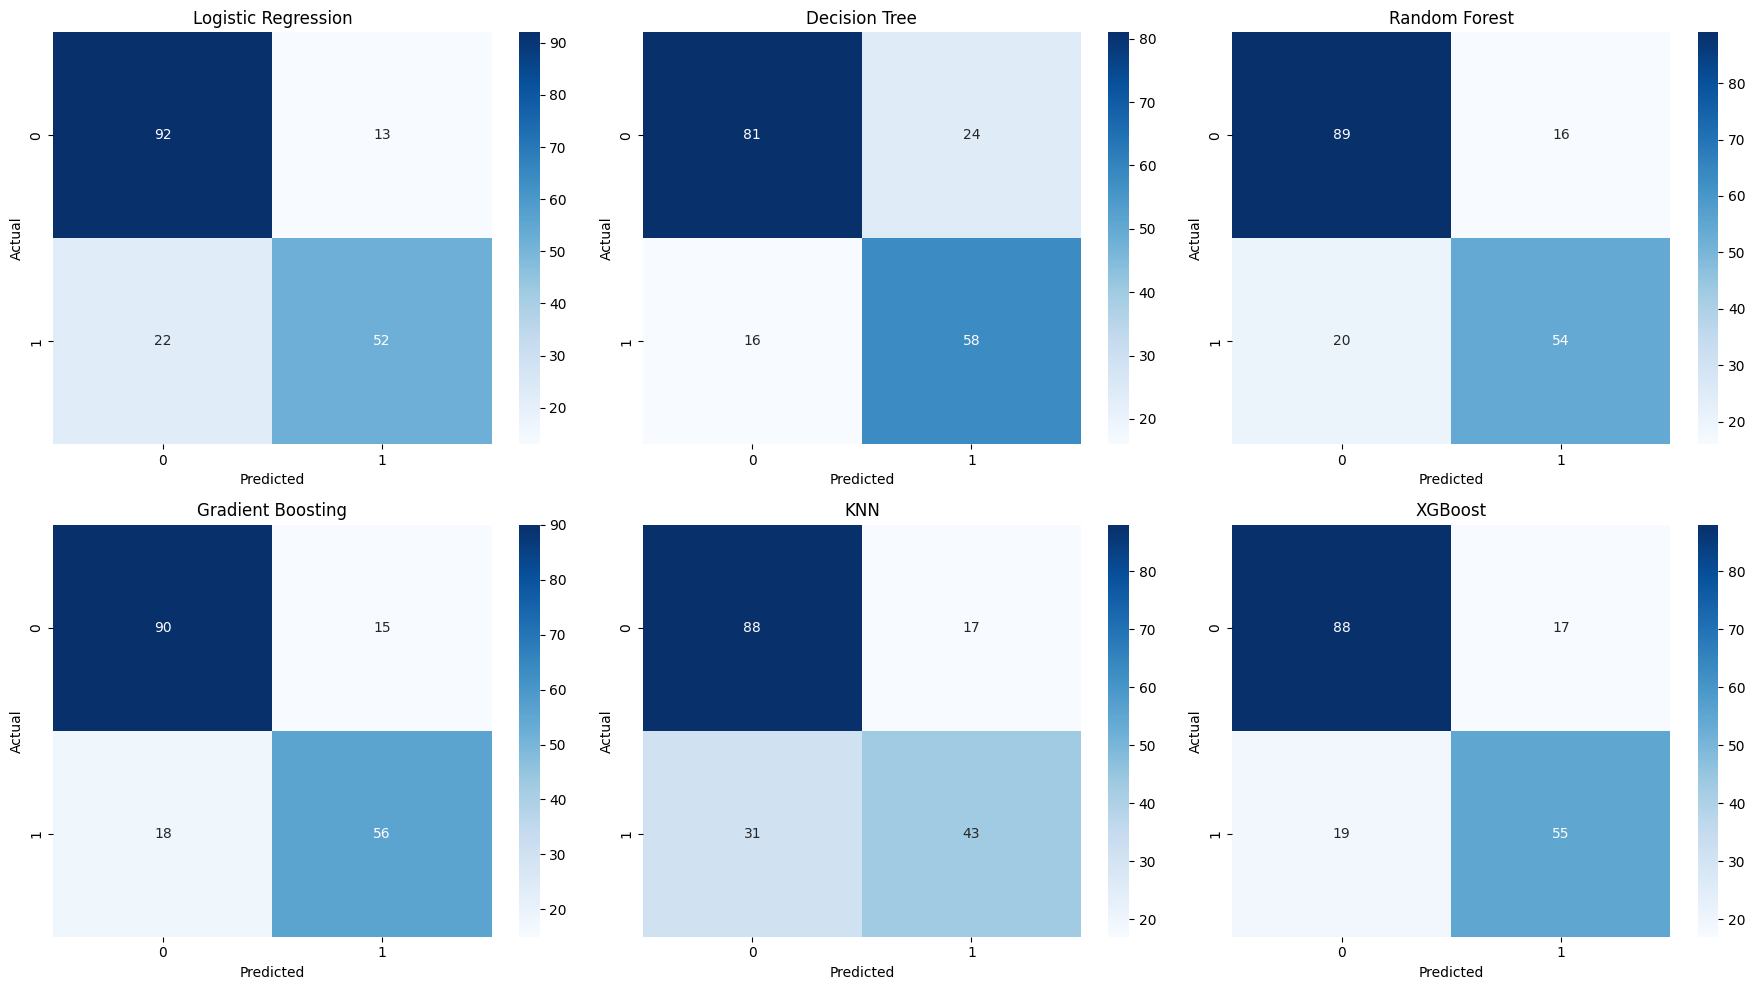

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot confusion matrix for each model
for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

📈 5. ROC Curve & AUC

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR)  
at different classification thresholds.

It shows how well a model can distinguish between the classes.  
The Area Under the Curve (AUC) summarizes the overall performance — higher is better.

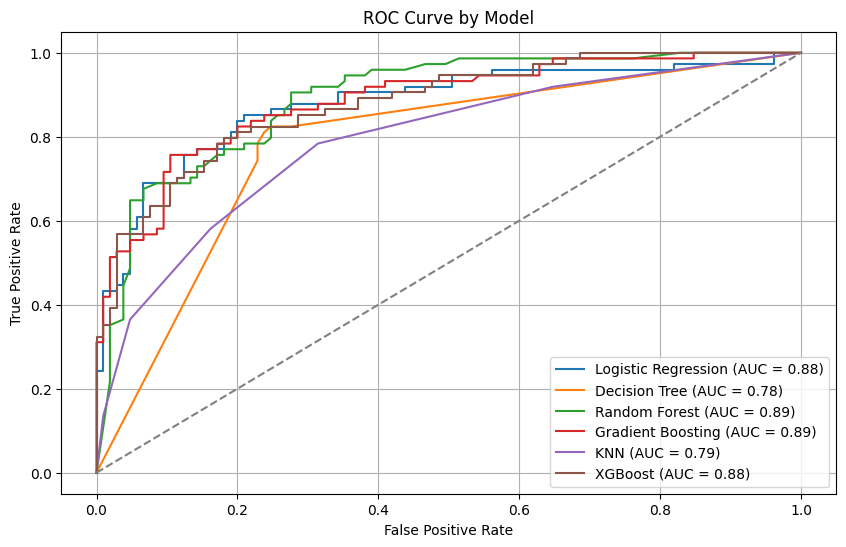

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC curve for each model with probability output
plt.figure(figsize=(10, 6))

for name, prob in probas.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve by Model')
plt.legend()
plt.grid(True)
plt.show()

## 🧠 Summary

In this notebook, I evaluated several classification models beyond accuracy,  
using additional metrics like precision, recall, F1 score, confusion matrix, and ROC-AUC.

Key takeaways:

- While most models performed similarly in terms of accuracy,  
  **Gradient Boosting** and **XGBoost** showed stronger balance across metrics.
- The **confusion matrix** helped identify differences in error types,  
  such as false negatives in simpler models.
- ROC curves and AUC scores confirmed the better overall discrimination ability  
  of boosting-based models.

This evaluation provides deeper insights into model behavior,  
and sets the foundation for selecting a final model or applying further tuning if needed.